In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace = True) #creates a new index starting from 0

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981


In [6]:
ma_100_days = data.Close.rolling(100).mean()

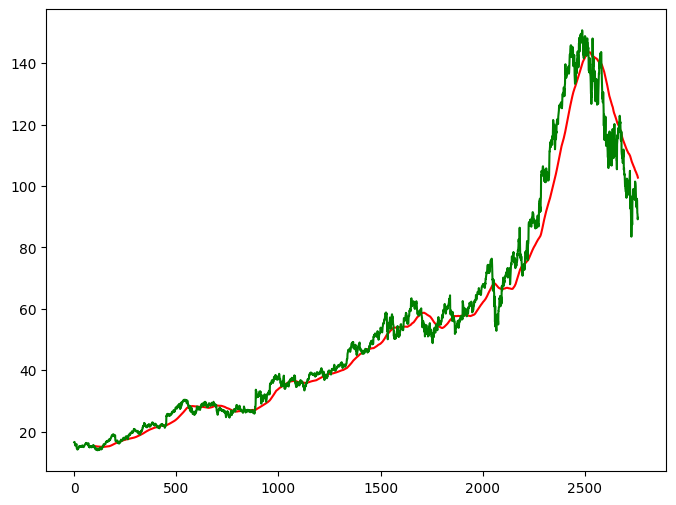

In [7]:
plt.figure(figsize=(8,6)) #set the size of the figure as 8 tall and 6 wide
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

In [9]:
pip uninstall jedi --yes

Note: you may need to restart the kernel to use updated packages.


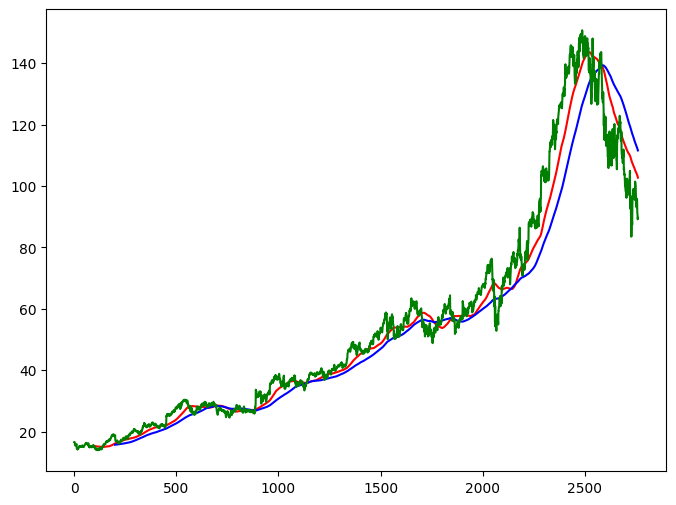

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
data.dropna(inplace = True) #inplace = true indicates it's working on og df

In [12]:
data_train =  pd.DataFrame(data.Close[0:int(len(data)*0.80)]) # (0 to 80)%
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)]) # (80 to 100)%

In [13]:
data.shape

(2761, 7)

In [14]:
data_train.shape

(2208, 1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

#scaling done to get results in a specific range
#wide variations use this tech

In [16]:
data_train_scale = scaler.fit_transform(data_train) 

In [17]:
x =[]
y =[]


for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i]) #sequential, 0-100 then 1-101 then 2-102
    y.append(data_train_scale[i,0]) 

x,y = np.array(x),np.array(y)   

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50,activation='relu',return_sequences=True,
              input_shape=((x.shape[1],1)))) #columns only

#return_sequence verifies that output of one layer is input of another

model.add(Dropout(0.2))

model.add(LSTM(units =60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add((LSTM(units=120,activation='relu')))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [20]:
x.shape

(2108, 100, 1)

In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
model.fit(x,y,epochs=50, batch_size=32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 172ms/step - loss: 0.0707
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - loss: 0.0070
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - loss: 0.0057
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - loss: 0.0054
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0053
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - loss: 0.0050
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0050
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0044
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - loss: 0.0045
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - loss: 0.0042
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - loss: 0.0036
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - loss: 0.0036
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0038
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0041
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [23]:
x.shape

(2108, 100, 1)

In [24]:
past_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([past_100_days,data_test],ignore_index=True)

In [27]:
data_test_scale = scaler.fit_transform(data_test) 

In [29]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y = np.array(x),np.array(y)

In [34]:
scale = 1/scaler.scale_

In [35]:
y_predict = y_predict*scale

In [36]:
y = y*scale

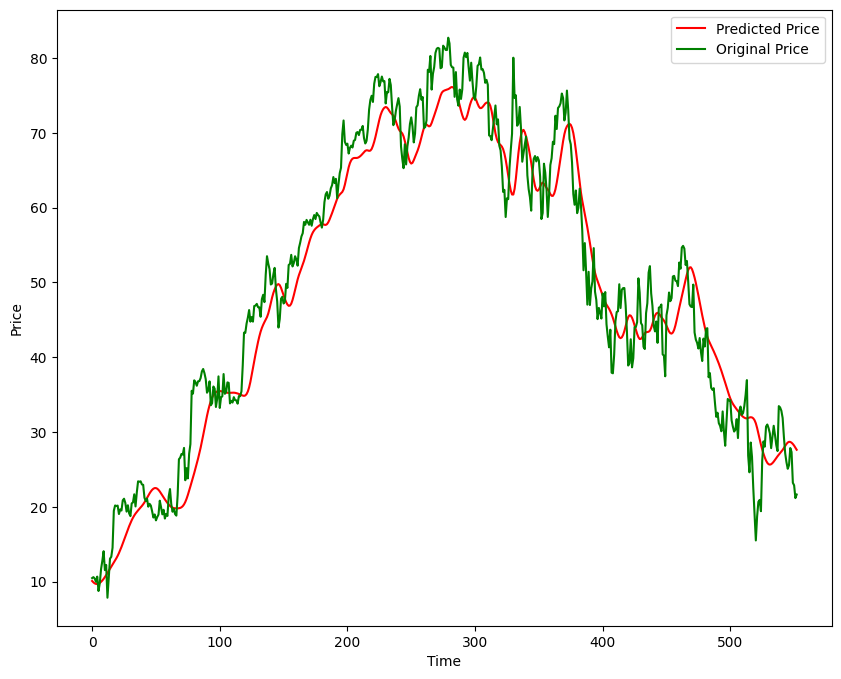

In [37]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
model.save('Stock Predictions Model.keras')